In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import folium
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

%matplotlib inline

# Get authentication to access google drive (bridge the colab with gdrive)

auth.authenticate_user() #authentication to google colab
gauth = GoogleAuth() #from google drive
gauth.credentials = GoogleCredentials.get_application_default() #token 
drive = GoogleDrive(gauth) #token to gdrive to pull file

In [2]:
# Google drive link
# Note: File is in zipped format
google_drive_link = 'https://drive.google.com/file/d/1OfoKS4HFAWveVzdebSrZMStzVDM159cu/view?usp=sharing'
google_drive_file_name = "Chicago_Crimes_2012_to_2017.csv.zip"

In [3]:
# to get the id part of the file
file_id = google_drive_link.split("/")[-2]

print(f"File idL {file_id}")

# Download file from Google Drive into Colab
downloaded = drive.CreateFile({'id':file_id})
downloaded.GetContentFile(google_drive_file_name)
print("Downloaded")

File idL 1OfoKS4HFAWveVzdebSrZMStzVDM159cu
Downloaded


In [4]:
# Unzipped the file and extract all the content inside it
with zipfile.ZipFile(google_drive_file_name, 'r') as zip_ref: zip_ref.extractall()

In [5]:
# Remove zip keyword in the filename
# Then read csv file with Pandas

filename = google_drive_file_name.replace(".zip","")
#df.head(10)

In [6]:
#df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
df = pd.read_csv(filename, error_bad_lines=False)
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [ ]:
df.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [7]:
df['Date_formatted'] = pd.to_datetime(df['Date'])

In [8]:
df.index = pd.DatetimeIndex(df['Date'])
df_backup = pd.DataFrame(df)
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Date_formatted          0
dtype: int64

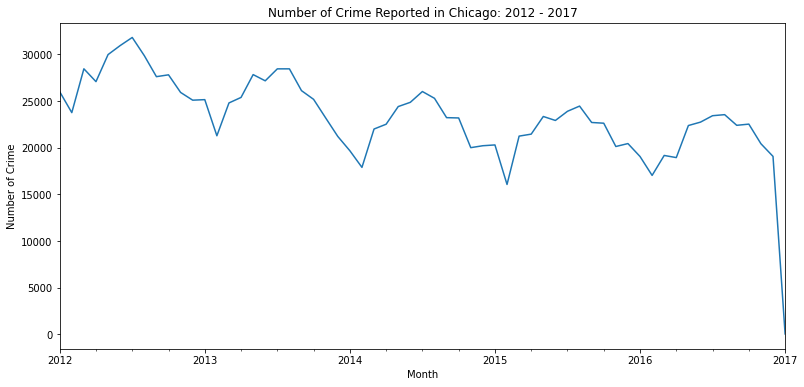

In [ ]:
plt.figure(figsize=(13,6))
df['Primary Type'].resample('M').size().plot(xlabel='Month',
                                             ylabel='Number of Crime',
                                             title='Number of Crime Reported in Chicago: 2012 - 2017')
plt.savefig('overall_crime_20122017.png')

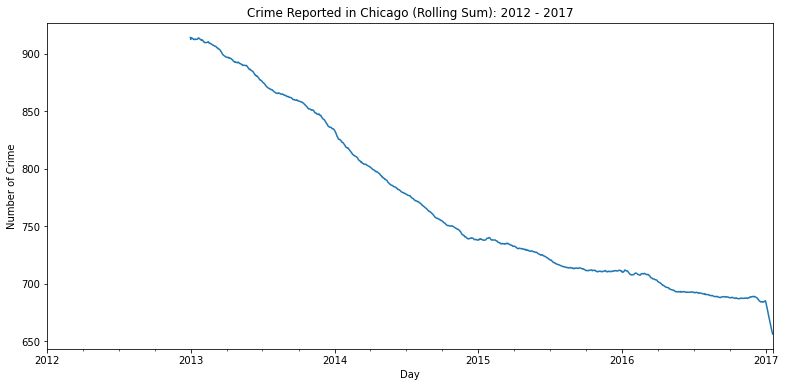

In [ ]:
plt.figure(figsize=(13,6))
df['Primary Type'].resample('D').size().rolling(365).mean().plot(xlabel='Day',
                                                              ylabel='Number of Crime',
                                                              title='Crime Reported in Chicago (Rolling Sum): 2012 - 2017')
plt.savefig('roll_sum_2012-2017.png')

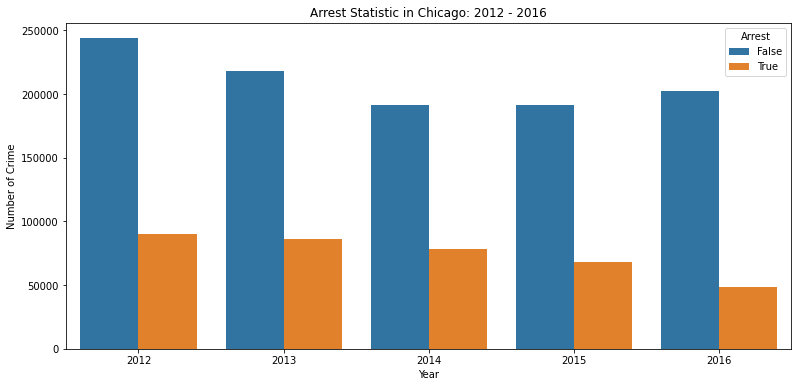

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x='Year',
              data=df[df['Year']!=2017],
              hue='Arrest')
plt.title('Arrest Statistic in Chicago: 2012 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.savefig('arrest_stat_20122016.png')

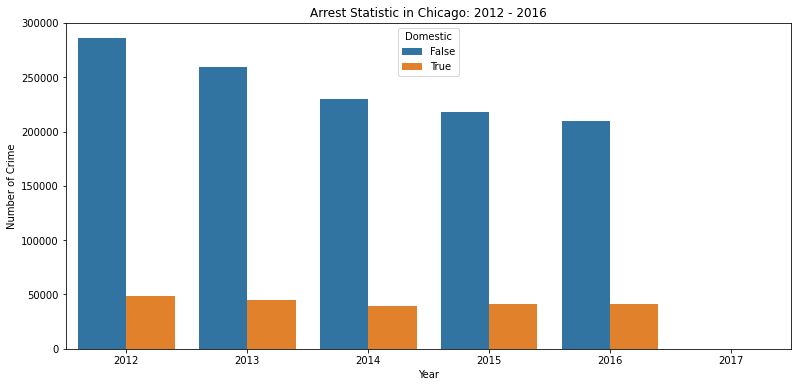

In [85]:
plt.figure(figsize=(13,6))
sns.countplot(x='Year',
              data=df,
              hue='Domestic')
plt.title('Arrest Statistic in Chicago: 2012 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.savefig('arrest_stat_20122016')

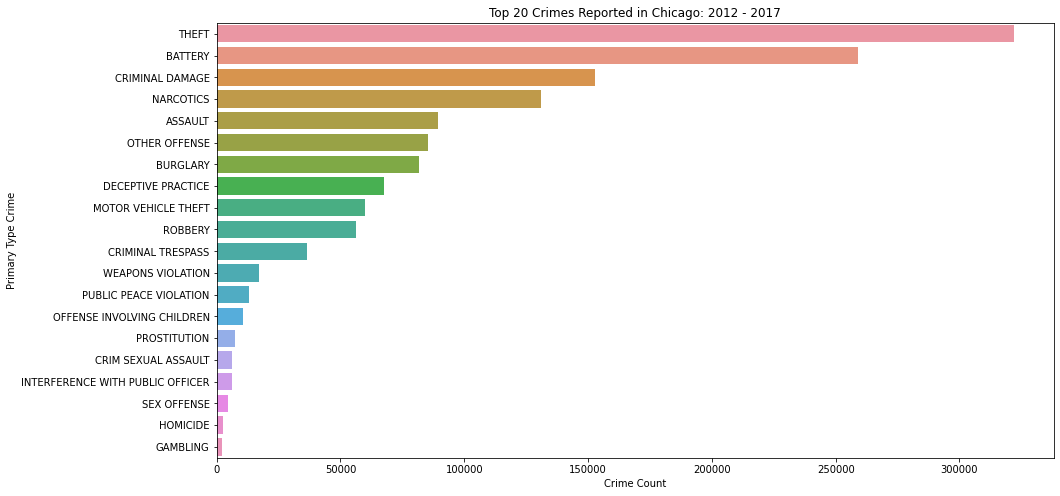

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y='Primary Type',
              data=df,
              order=df['Primary Type'].value_counts().iloc[:20].index)
plt.title('Top 20 Crimes Reported in Chicago: 2012 - 2017')
plt.xlabel('Crime Count')
plt.ylabel('Primary Type Crime')
plt.savefig('top20_crime_20122017.png')

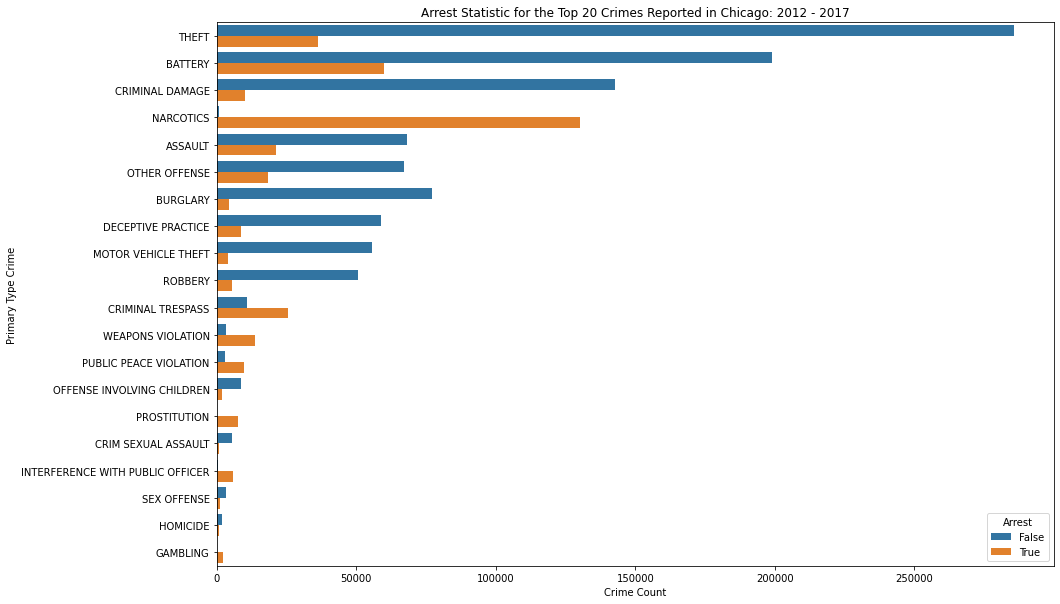

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',
              data=df,
              hue='Arrest',
              order=df['Primary Type'].value_counts().iloc[:20].index)
plt.title('Arrest Statistic for the Top 20 Crimes Reported in Chicago: 2012 - 2017')
plt.xlabel('Crime Count')
plt.ylabel('Primary Type Crime')
plt.savefig('top20_arres_stat_20122017')

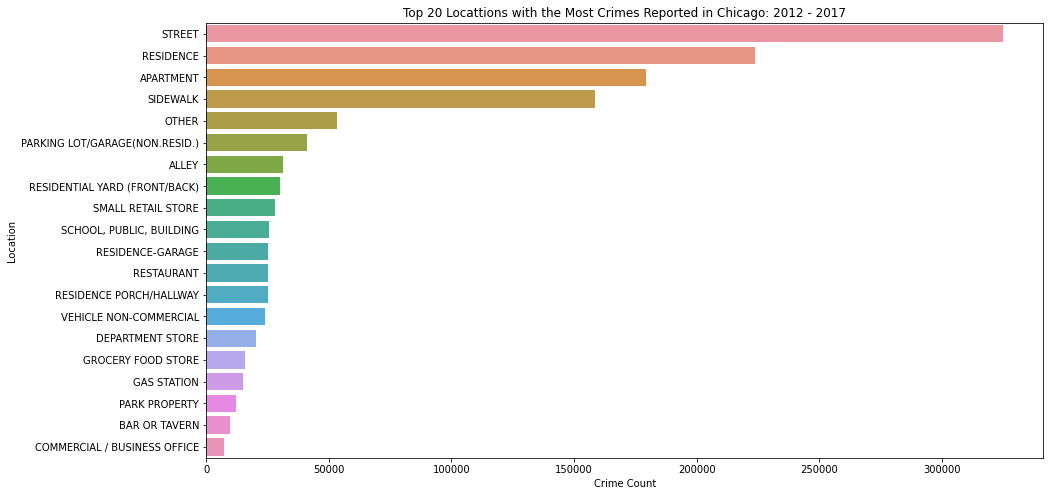

In [ ]:
plt.figure(figsize=(15,8)) 
sns.countplot(y='Location Description',
              data=df,
              order=df['Location Description'].value_counts().iloc[:20].index)
plt.title('Top 20 Locattions with the Most Crimes Reported in Chicago: 2012 - 2017')
plt.xlabel('Crime Count')
plt.ylabel('Location')
plt.savefig('top20_crimeloc_20122017.png')

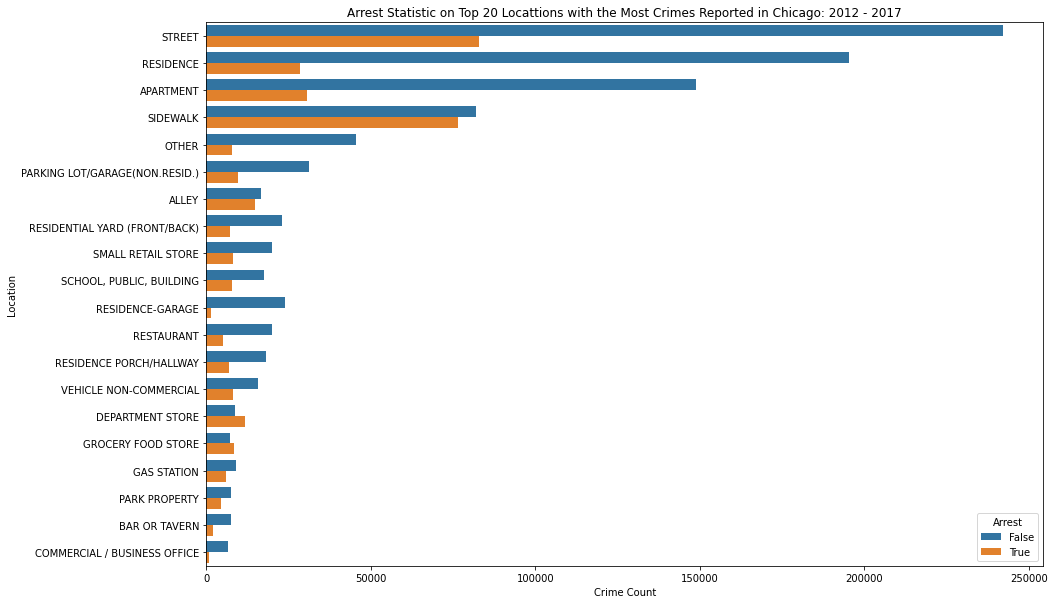

In [ ]:
plt.figure(figsize=(15,10)) 
sns.countplot(y='Location Description',
              data=df,
              hue='Arrest',
              order=df['Location Description'].value_counts().iloc[:20].index)
plt.title('Arrest Statistic on Top 20 Locattions with the Most Crimes Reported in Chicago: 2012 - 2017')
plt.xlabel('Crime Count')
plt.ylabel('Location')
plt.savefig('top20_arrest_crimeloc_20122017.png') 

In [ ]:
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]
df_2014 = df[df['Year'] == 2014]
df_2015 = df[df['Year'] == 2015]
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]
df_overall_month=pd.DataFrame({'Overall':df.index.month.value_counts(),
                              '2012':df_2012.index.month.value_counts(),
                              '2013':df_2013.index.month.value_counts(),
                              '2014':df_2014.index.month.value_counts(),
                              '2015':df_2015.index.month.value_counts(),
                              '2016':df_2016.index.month.value_counts()})
#df_overall_month.reset_index(inplace=True)
df_overall_month

,Overall,2012,2013,2014,2015,2016
1,110225,26006,25155,19676,20299,19059
2,96027,23762,21281,17892,16061,17031
3,115682,28461,24801,22005,21244,19171
4,115395,27085,25393,22519,21457,18941
5,127967,29986,27840,24413,23349,22379
6,128657,30951,27173,24867,22922,22744
7,133638,31821,28455,26025,23905,23432
8,131630,29867,28457,25297,24464,23545
9,122070,27619,26119,23224,22706,22402
10,121351,27815,25187,23191,22628,22530


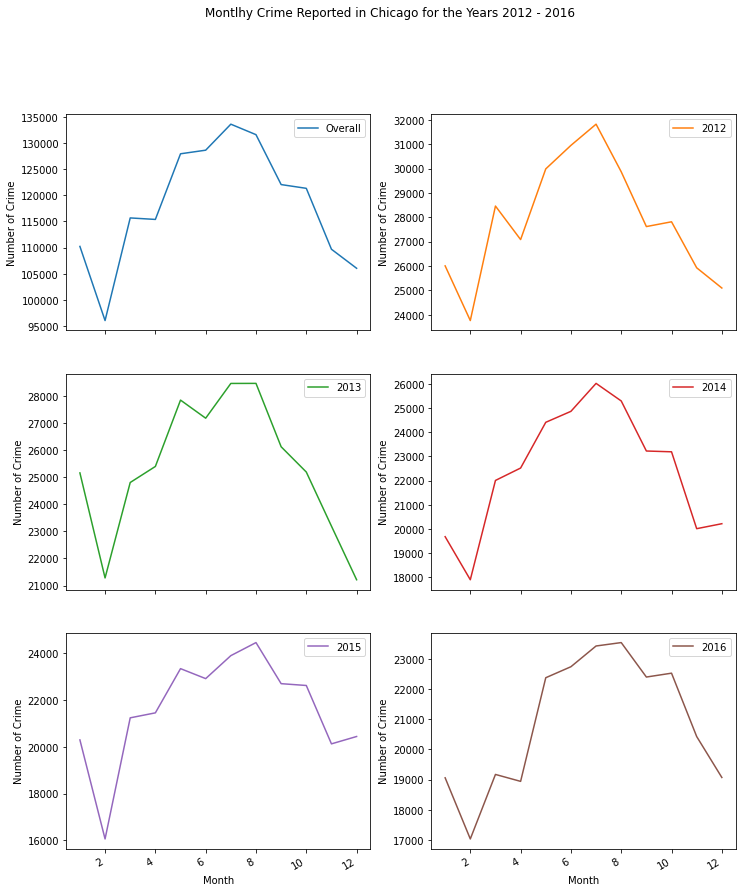

In [ ]:
plo=df_overall_month.plot(subplots=True, 
                          figsize=(12,15),
                          layout=(-1,2),
                          title='Montlhy Crime Reported in Chicago for the Years 2012 - 2016',
                          xlabel='Month',
                          ylabel='Number of Crime')
plt.savefig('montly_crime_20122017.png')

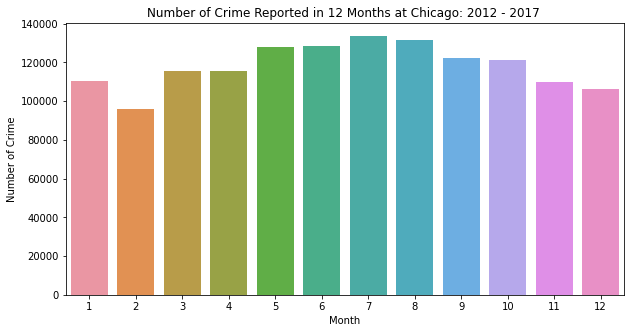

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_overall_month.index,
            y='Overall',
            data=df_overall_month,
            ci=None,
            estimator=sum)
plt.xlabel('Month')
plt.ylabel('Number of Crime')
plt.title('Number of Crime Reported in 12 Months at Chicago: 2012 - 2017 ')
plt.savefig('overall_monlty_crime.png')

In [ ]:
df_overall_hour=pd.DataFrame({'crime_count':df.index.hour.value_counts()})
df_overall_hour.reset_index(inplace=True)

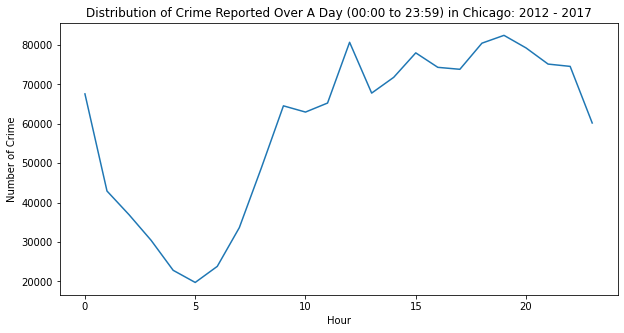

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.lineplot(x='index',
             y='crime_count',
             data=df_overall_hour)
plt.title('Distribution of Crime Reported Over A Day (00:00 to 23:59) in Chicago: 2012 - 2017')
plt.xlabel('Hour')
plt.ylabel('Number of Crime')
plt.savefig('overall_hourly_crime_20122017.png')

In [ ]:
df_overall_hour.columns=['hour','crime_count']
df_overall_hour.sort_index(inplace=True)
df_overall_hour[:5]

,hour,crime_count
0,19,82454
1,12,80695
2,18,80469
3,20,79262
4,15,78011


In [ ]:
def weather(month):
  if (month >= 3) & (month <= 5):
    return 'Spring'
  elif (month >= 6) & (month <=8):
    return 'Summer'
  elif (month >= 9) & (month <=11):
    return 'Autumn'
  else:
    return 'Winter' 
  

In [ ]:
df['season'] = df['Date_formatted'].dt.month.apply(weather)

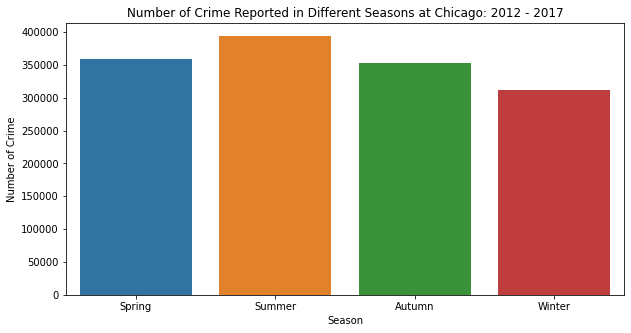

In [ ]:
plt.figure(figsize=(10,5))
label=['Spring','Summer','Autumn','Winter']
sns.countplot(x='season',
              data=df,
              order=label)
plt.title('Number of Crime Reported in Different Seasons at Chicago: 2012 - 2017')
plt.xlabel('Season')
plt.ylabel('Number of Crime')
plt.savefig('overall_season_crime_20122017.png')

Text(0, 0.5, 'Number of Crime')

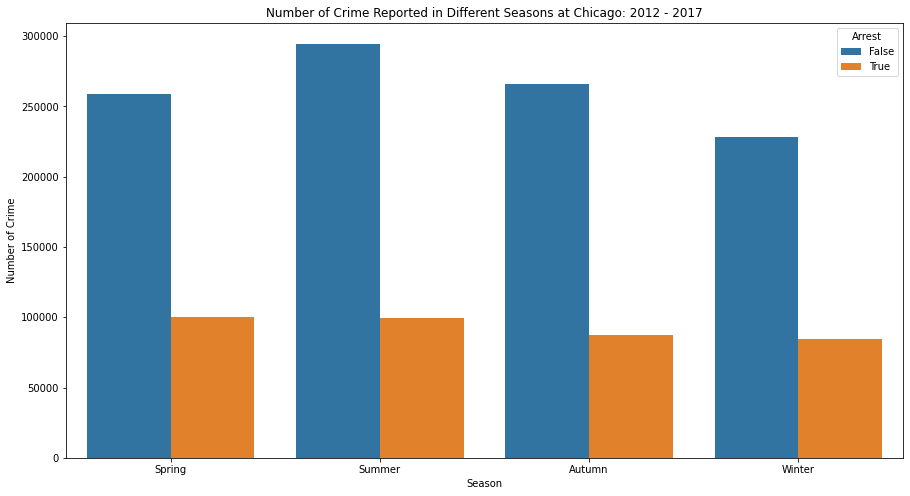

In [ ]:
plt.figure(figsize=(10,5))
label=['Spring','Summer','Autumn','Winter']
sns.countplot(x='season',
              data=df,
              hue='Arrest',
              order=label)
plt.title('Number of Crime Reported in Different Seasons at Chicago: 2012 - 2017')
plt.xlabel('Season')
plt.ylabel('Number of Crime')

Text(0, 0.5, 'Primary Type Crime')

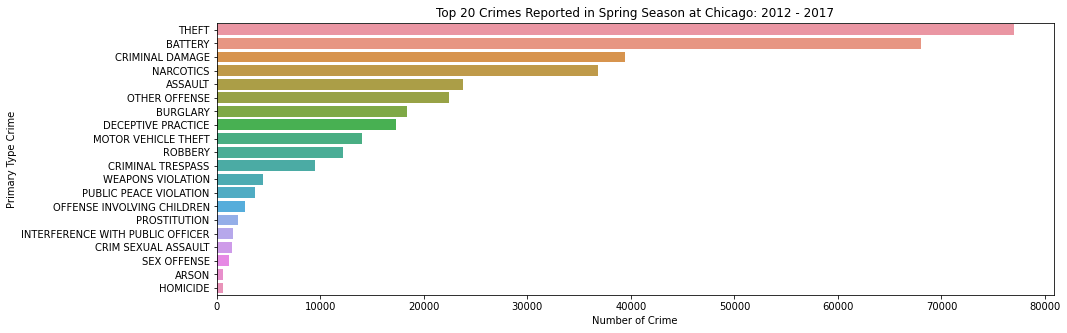

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Primary Type',
              data=df[df['season'] == 'Spring'],
              order=df[df['season'] == 'Spring']['Primary Type'].value_counts().iloc[:20].index)
plt.title('Top 20 Crimes Reported in Spring Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Primary Type Crime')

Text(0, 0.5, 'Location')

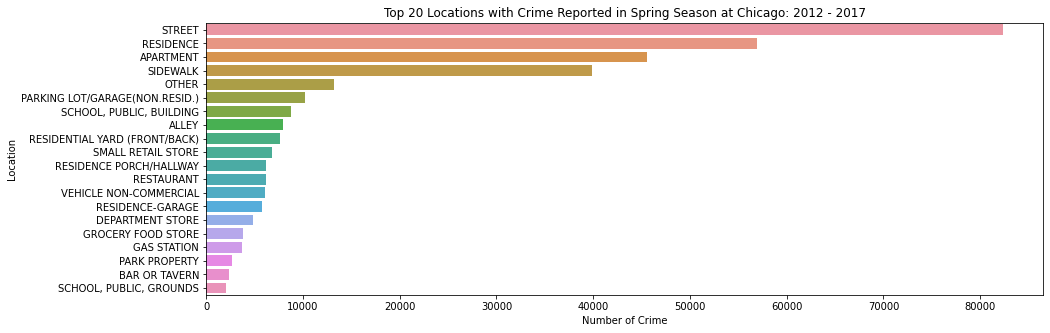

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Location Description',
              data=df[df['season'] == 'Spring'],
              order=df[df['season'] == 'Spring']['Location Description'].value_counts().iloc[:20].index)
plt.title('Top 20 Locations with Crime Reported in Spring Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Location')

Text(0, 0.5, 'Primary Type Crime')

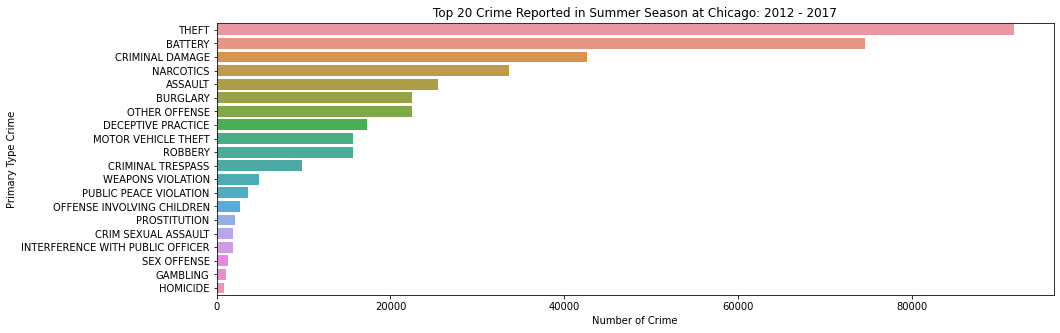

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Primary Type',
              data=df[df['season'] == 'Summer'],
              order=df[df['season'] == 'Summer']['Primary Type'].value_counts().iloc[:20].index)
plt.title('Top 20 Crimes Reported in Summer Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Primary Type Crime')

Text(0, 0.5, 'Location')

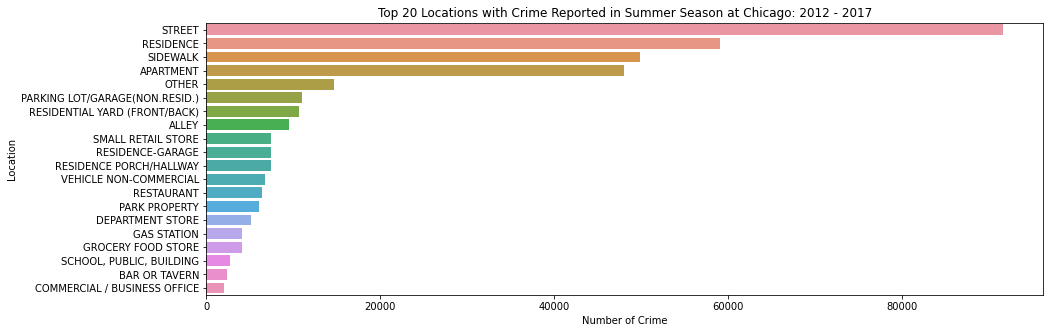

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Location Description',
              data=df[df['season'] == 'Summer'],
              order=df[df['season'] == 'Summer']['Location Description'].value_counts().iloc[:20].index)
plt.title('Top 20 Locations with Crime Reported in Summer Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Location')

Text(0, 0.5, 'Primary Type Crime')

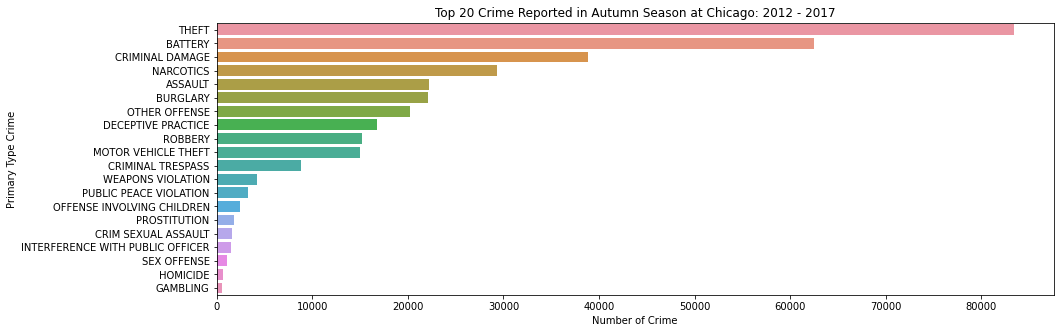

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Primary Type',
              data=df[df['season'] == 'Autumn'],
              order=df[df['season'] == 'Autumn']['Primary Type'].value_counts().iloc[:20].index)
plt.title('Top 20 Crimes Reported in Autumn Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Primary Type Crime')

Text(0, 0.5, 'Location')

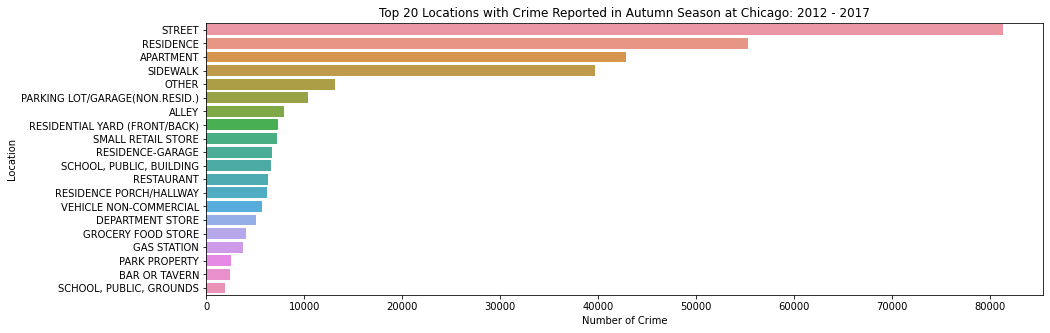

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Location Description',
              data=df[df['season'] == 'Autumn'],
              order=df[df['season'] == 'Autumn']['Location Description'].value_counts().iloc[:20].index)
plt.title('Top 20 Locations with Crime Reported in Autumn Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Location')

Text(0, 0.5, 'Primary Type Crime')

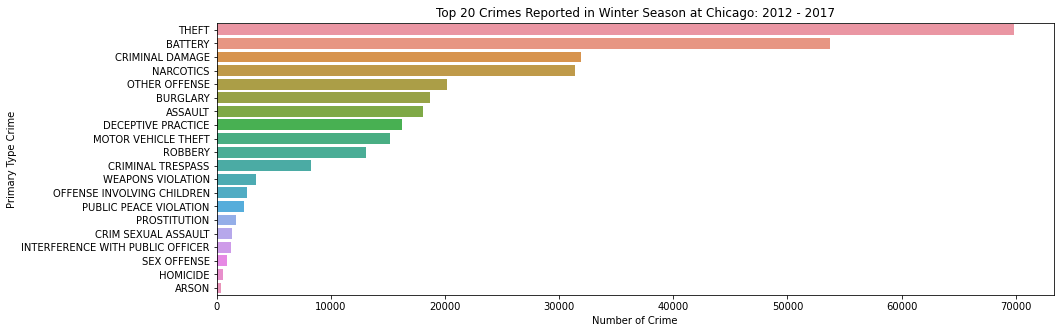

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Primary Type',
              data=df[df['season'] == 'Winter'],
              order=df[df['season'] == 'Winter']['Primary Type'].value_counts().iloc[:20].index)
plt.title('Top 20 Crimes Reported in Winter Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Primary Type Crime')

Text(0, 0.5, 'Location')

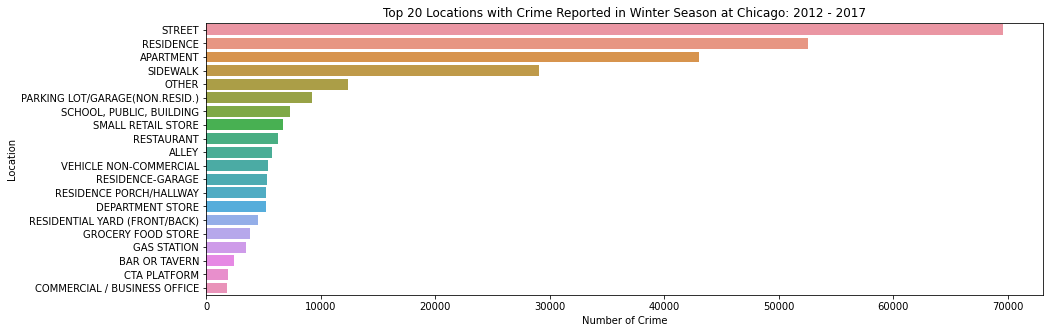

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Location Description',
              data=df[df['season'] == 'Winter'],
              order=df[df['season'] == 'Winter']['Location Description'].value_counts().iloc[:20].index)
plt.title('Top 20 Locations with Crime Reported in Winter Season at Chicago: 2012 - 2017')
plt.xlabel('Number of Crime')
plt.ylabel('Location')

In [10]:
lst_primary=df['Primary Type'].value_counts().iloc[:20].index
lst_location=df['Location Description'].value_counts().iloc[:20].index

In [11]:
df_primary_crime=df[df['Primary Type'].isin(lst_primary)]
df_location=df[df['Location Description'].isin(lst_location)]

In [12]:
df_date_loc_pivot = df_location.pivot_table('ID',
                                     aggfunc=np.size,
                                     index=df_location.index.date,
                                     columns='Location Description').fillna(0)

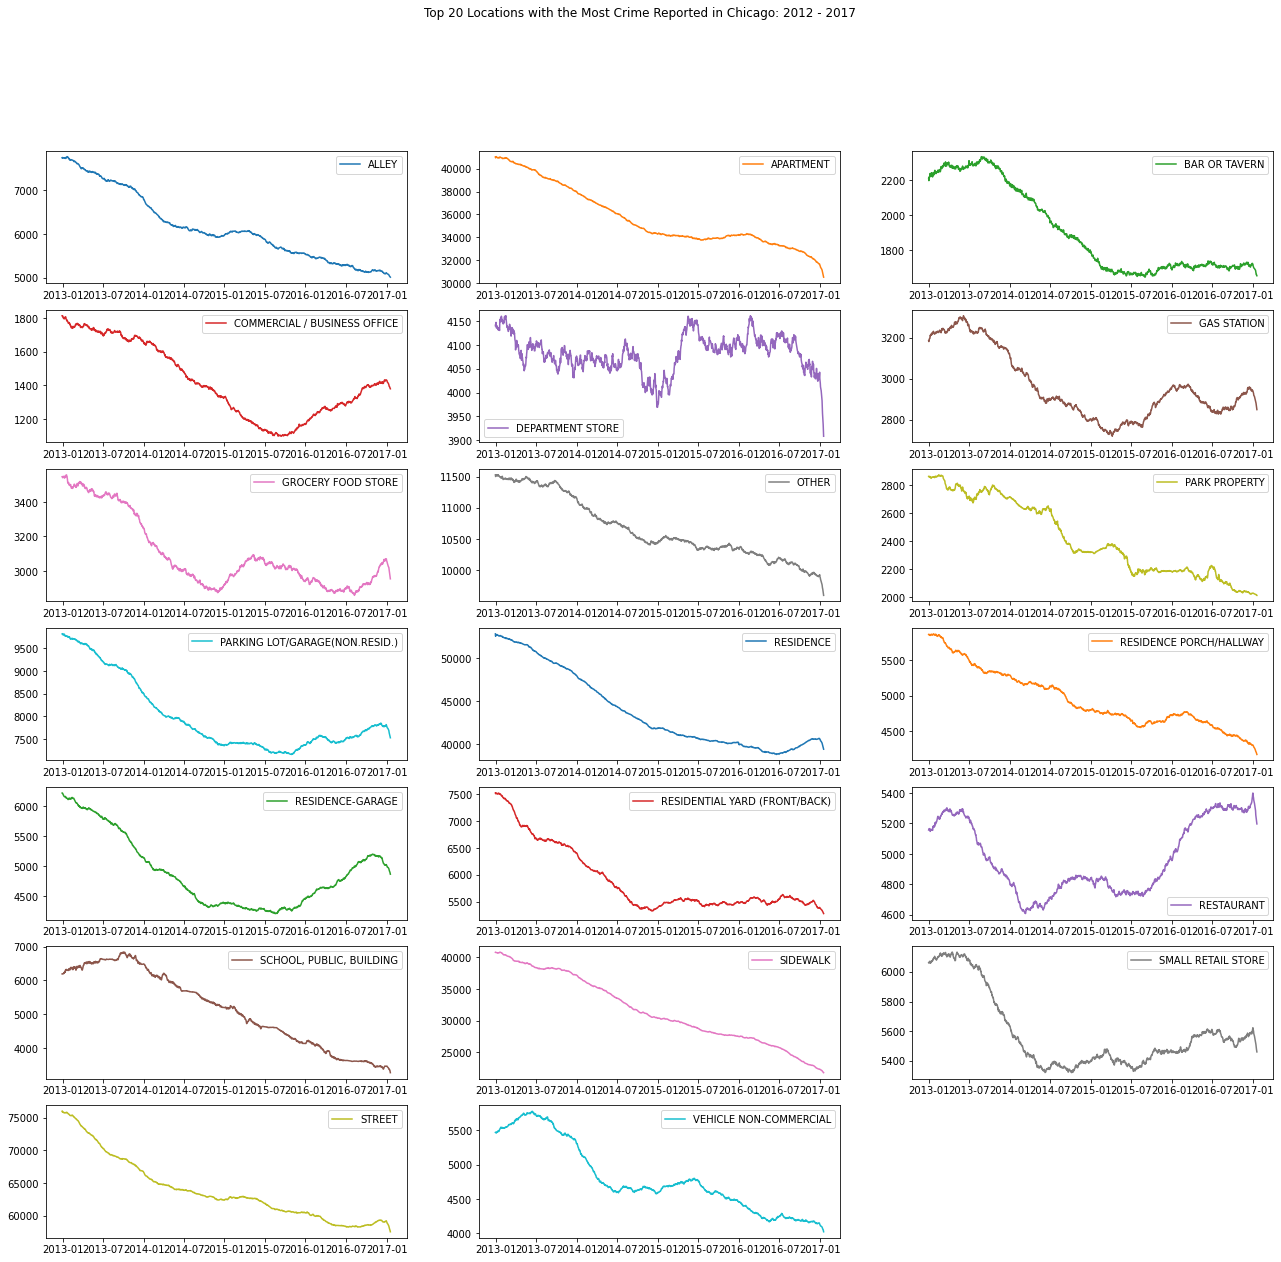

In [17]:
plot=df_date_loc_pivot.rolling(365).sum().plot(subplots=True, 
                                                sharey=False, 
                                                sharex=False,
                                                figsize=(22,20),
                                                 layout=(-1,3),
                                               title='Top 20 Locations with the Most Crime Reported in Chicago: 2012 - 2017')
                                               
plt.savefig('individual_crime_20122017.png')

In [14]:
df_date_crime_pivot = df_primary_crime.pivot_table('ID',
                                     aggfunc=np.size,
                                     index=df_primary_crime.index.date,
                                     columns='Primary Type').fillna(0)

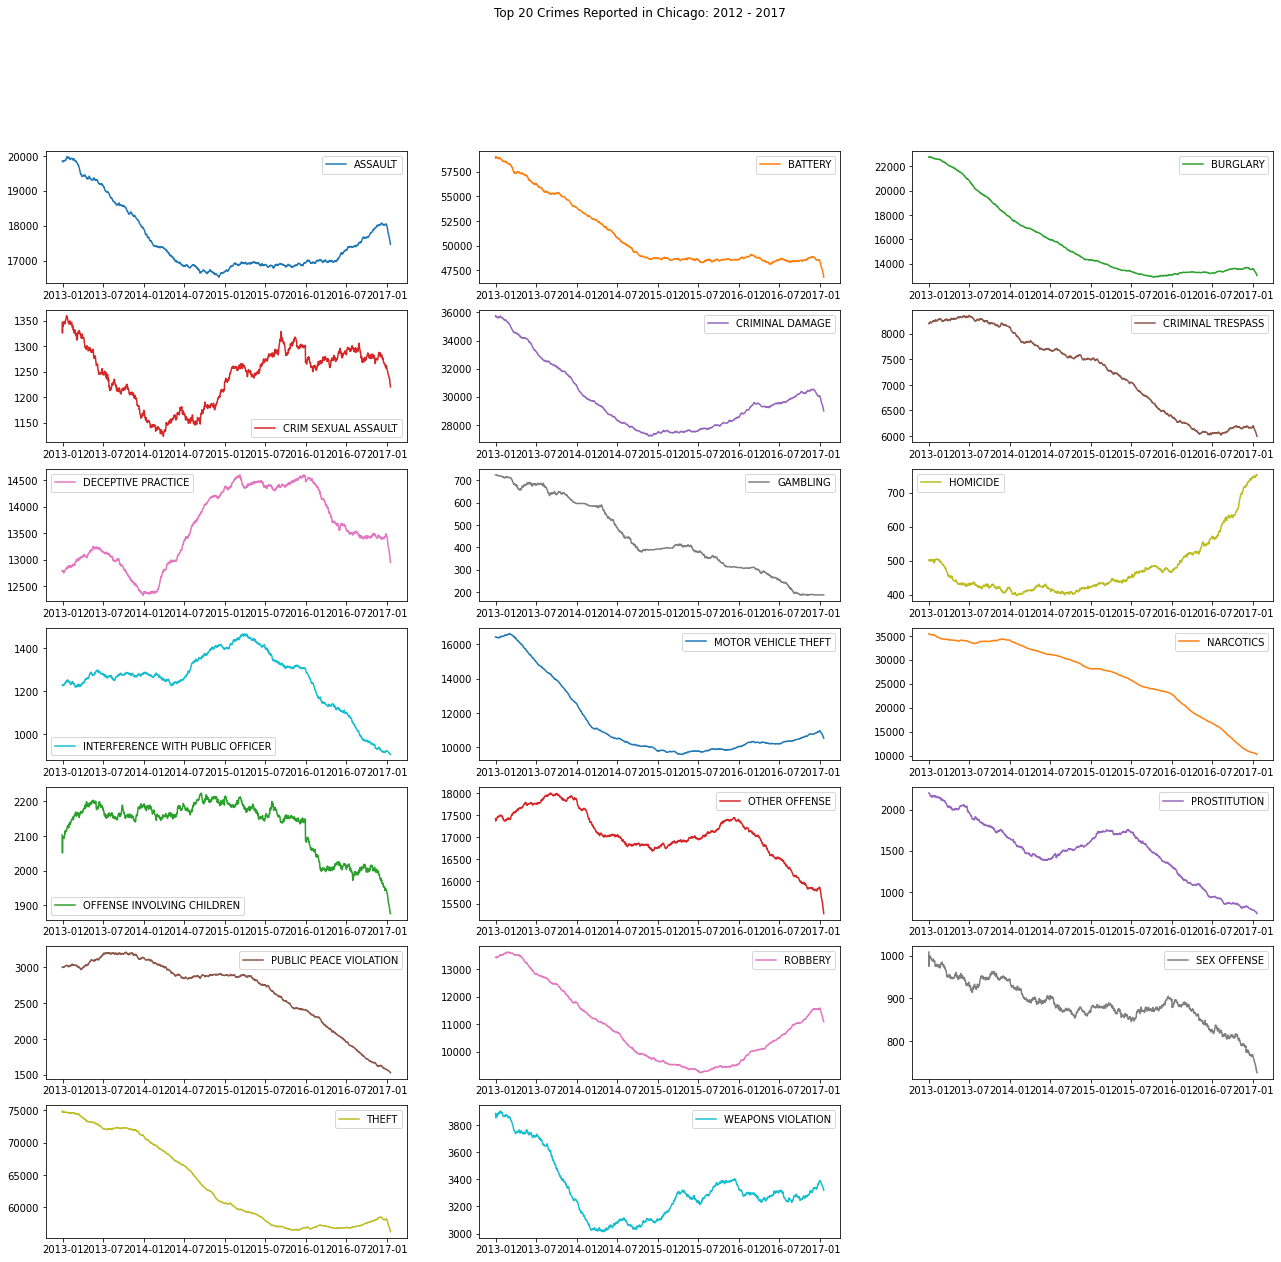

In [16]:
plot=df_date_crime_pivot.rolling(365).sum().plot(subplots=True, 
                                                sharey=False, 
                                                sharex=False,
                                                figsize=(22,20),
                                                 layout=(-1,3),
                                                 title='Top 20 Crimes Reported in Chicago: 2012 - 2017')
plt.savefig('individual_crimelocation_20122017.png')

Text(0, 0.5, 'Number of Crime')

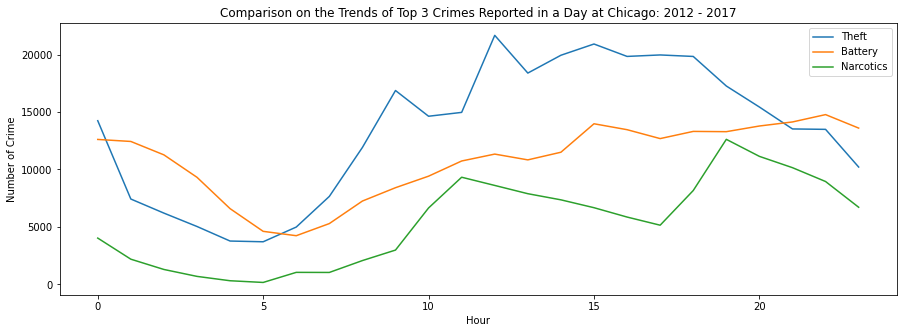

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_hour_crime_pivot.index,
             y='THEFT',
             data=df_hour_crime_pivot,
             label='Theft')
sns.lineplot(x=df_hour_crime_pivot.index,
             y='BATTERY',
             data=df_hour_crime_pivot,
             label='Battery')
sns.lineplot(x=df_hour_crime_pivot.index,
             y='NARCOTICS',
             data=df_hour_crime_pivot,
             label='Narcotics')
plt.title('Comparison on the Trends of Top 3 Crimes Reported in a Day at Chicago: 2012 - 2017')
plt.xlabel('Hour')
plt.ylabel('Number of Crime')

Text(0, 0.5, 'Number of Crime')

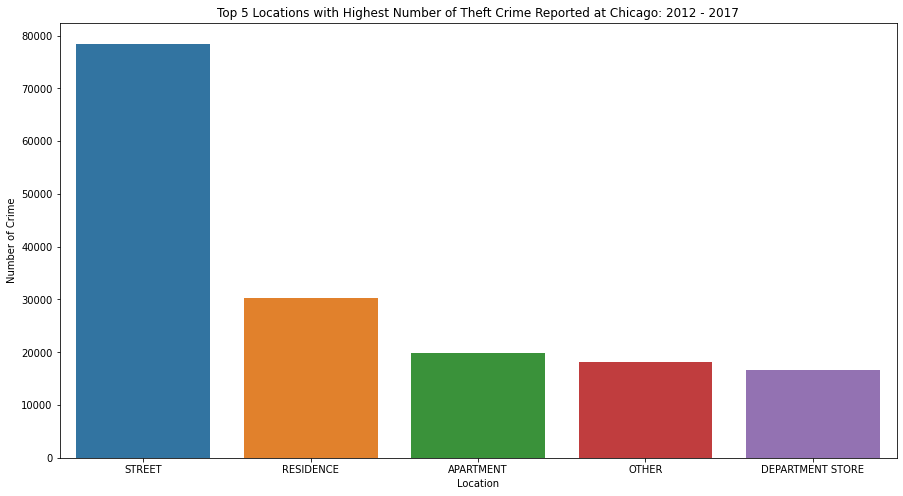

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Location Description',
              data=df[df['Primary Type'] == 'THEFT'],
              order=df[df['Primary Type'] == 'THEFT']['Location Description'].value_counts().iloc[:5].index)
plt.title('Top 5 Locations with Highest Number of Theft Crime Reported at Chicago: 2012 - 2017')
plt.xlabel('Location')
plt.ylabel('Number of Crime')

In [ ]:
df_temp = pd.DataFrame({'crime_count':df[df['Primary Type'] == 'THEFT']['Location Description'].value_counts()})
df_temp.reset_index(inplace=True)
df_temp.columns=['Location','crime_count']
df_temp[:5]

,Location,crime_count
0,STREET,78467
1,RESIDENCE,30317
2,APARTMENT,19765
3,OTHER,18130
4,DEPARTMENT STORE,16709


In [ ]:
df_theft=df[df['Primary Type']=='THEFT']
df_hour_loc_pivot=df_theft.pivot_table('ID',
                                 aggfunc=np.size,
                                 index=df_theft.index.hour,
                                 columns='Location Description').fillna(0)
                             

Text(0, 0.5, 'Number of Crime')

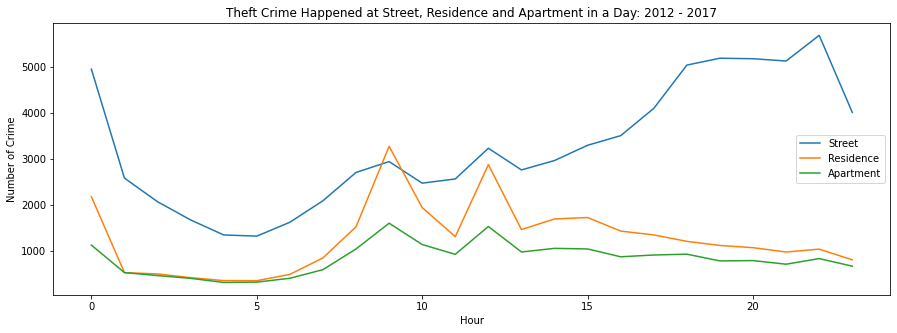

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_hour_loc_pivot.index,
             y='STREET',
             data=df_hour_loc_pivot,
             label='Street')
sns.lineplot(x=df_hour_loc_pivot.index,
             y='RESIDENCE',
             data=df_hour_loc_pivot,
             label='Residence')
sns.lineplot(x=df_hour_loc_pivot.index,
             y='APARTMENT',
             data=df_hour_loc_pivot,
             label='Apartment')
plt.title('Theft Crime Happened at Street, Residence and Apartment in a Day: 2012 - 2017')
plt.xlabel('Hour')
plt.ylabel('Number of Crime')

Text(0, 0.5, 'Number of Crime')

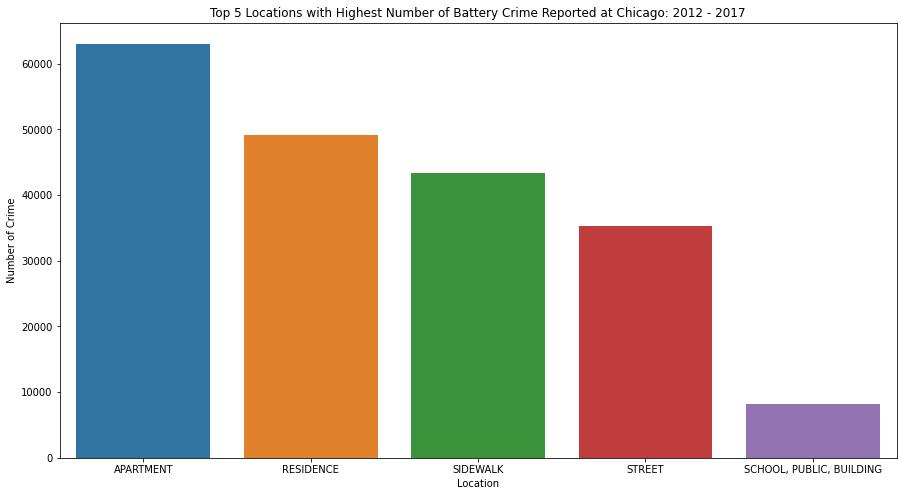

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='Location Description',
              data=df[df['Primary Type'] == 'BATTERY'],
              order=df[df['Primary Type'] == 'BATTERY']['Location Description'].value_counts().iloc[:5].index)
plt.title('Top 5 Locations with Highest Number of Battery Crime Reported at Chicago: 2012 - 2017')
plt.xlabel('Location')
plt.ylabel('Number of Crime')

In [ ]:
df_temp = pd.DataFrame({'crime_count':df[df['Primary Type'] == 'BATTERY']['Location Description'].value_counts()})
df_temp.reset_index(inplace=True)
df_temp.columns=['Location','crime_count']
df_temp[:5]

,Location,crime_count
0,APARTMENT,63057
1,RESIDENCE,49075
2,SIDEWALK,43293
3,STREET,35268
4,"SCHOOL, PUBLIC, BUILDING",8264


In [ ]:
df_batt=df[df['Primary Type']=='BATTERY']
df_hour_loc_pivot=df_batt.pivot_table('ID',
                                 aggfunc=np.size,
                                 index=df_batt.index.hour,
                                 columns='Location Description').fillna(0)
                             

Text(0, 0.5, 'Number of Crime')

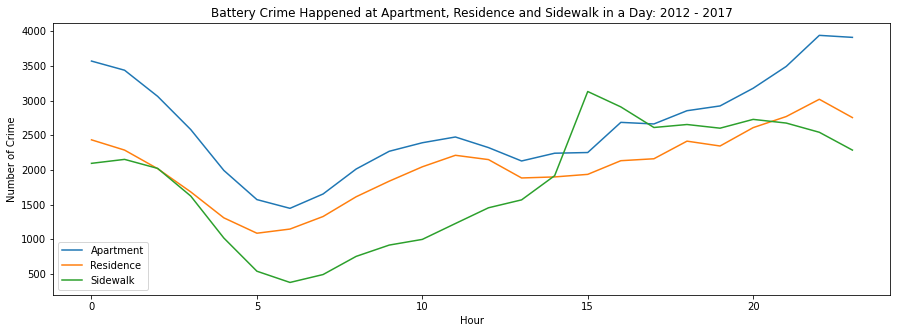

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_hour_loc_pivot.index,
             y='APARTMENT',
             data=df_hour_loc_pivot,
             label='Apartment')
sns.lineplot(x=df_hour_loc_pivot.index,
             y='RESIDENCE',
             data=df_hour_loc_pivot,
             label='Residence')
sns.lineplot(x=df_hour_loc_pivot.index,
             y='SIDEWALK',
             data=df_hour_loc_pivot,
             label='Sidewalk')
plt.title('Battery Crime Happened at Apartment, Residence and Sidewalk in a Day: 2012 - 2017')
plt.xlabel('Hour')
plt.ylabel('Number of Crime')

In [ ]:
df_overall_hour=df.pivot_table('ID',
                               aggfunc=np.size,
                               index=df.index.hour,
                               columns='Primary Type').fillna(0)
df_overall_hour.head()

In [ ]:
df_public_peace =  df[df['Primary Type'] == 'PUBLIC PEACE VIOLATION']
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), 
                               "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()

,Counts,Description
0,3391,BOMB THREAT
1,3227,RECKLESS CONDUCT
2,1837,ARSON THREAT
3,620,FALSE POLICE REPORT
4,328,FALSE FIRE ALARM


In [ ]:
unique_locations_bombs = df_public_peace['Location'].value_counts()
unique_locations_bombs

(41.878630716, -87.636673298)    115
(41.881524451, -87.662706932)     96
(41.881418867, -87.662484034)     96
(41.87855848, -87.636527202)      61
(41.976290414, -87.905227221)     56
                                ... 
(41.752675261, -87.723273345)      1
(41.964500432, -87.656899334)      1
(41.857806358, -87.654842294)      1
(41.932936015, -87.681485072)      1
(41.911198686, -87.772924982)      1
Name: Location, Length: 7578, dtype: int64

In [ ]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, 
                         "ValueCount":unique_locations_bombs})
#PB_index.index = range(len(unique_locations_bombs))
PB_index.reset_index(inplace=True)
PB_index=PB_index.drop(columns='index')
PB_index.head()

,Raw_String,ValueCount
0,"(41.878630716, -87.636673298)",115
1,"(41.881524451, -87.662706932)",96
2,"(41.881418867, -87.662484034)",96
3,"(41.87855848, -87.636527202)",61
4,"(41.976290414, -87.905227221)",56


In [ ]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [ ]:
PB_index['LocationCoord'] = PB_index['Raw_String'].apply(Location_extractor)
PB_index  = PB_index.drop(columns=['Raw_String'], axis = 1)

In [ ]:
chicago_crime_pp = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)
https://python-visualization.github.io/folium/quickstart.html

In [ ]:
for i in range(500):
    lat = PB_index['LocationCoord'].iloc[i][0]
    long = PB_index['LocationCoord'].iloc[i][1]
    radius = PB_index['ValueCount'].iloc[i] / 3
    
    if PB_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               PB_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_pp)

In [ ]:
folium.TileLayer('cartodbpositron').add_to(chicago_crime_pp)

In [ ]:
chicago_crime_pp